<a href="https://colab.research.google.com/github/Kvaibhav1997/World-Happiness-Record/blob/main/World_Happiness_Record.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
whr2015=pd.read_csv('2015.csv')
whr2016=pd.read_csv('2016.csv')
whr2017=pd.read_csv('2017.csv')
print(whr2015.shape)
print(whr2016.shape)
print(whr2017.shape)

(158, 12)
(157, 13)
(155, 12)


In [4]:
whr2017.head()

,Country,Happiness Rank,Happiness Score,Whisker high,Whisker low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [5]:
frame=[whr2015,whr2016,whr2017]
whr=pd.concat(frame)

In [6]:
whr.shape

(470, 16)

In [7]:
whr.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN


In [8]:
whr.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker high,Whisker low
150,Rwanda,NaN,151,3.471,NaN,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,NaN,NaN,3.543030,3.398970
151,Syria,NaN,152,3.462,NaN,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,NaN,NaN,3.663669,3.260331
152,Tanzania,NaN,153,3.349,NaN,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,NaN,NaN,3.461430,3.236570
153,Burundi,NaN,154,2.905,NaN,0.091623,0.629794,0.151611,0.059901,0.084148,0.204435,1.683024,NaN,NaN,3.074690,2.735310
154,Central African Republic,NaN,155,2.693,NaN,0.000000,0.000000,0.018773,0.270842,0.056565,0.280876,2.066005,NaN,NaN,2.864884,2.521116


In [9]:
whr.columns.value_counts()

Whisker low                      1
Upper Confidence Interval        1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
Family                           1
Standard Error                   1
Happiness Score                  1
Happiness Rank                   1
Lower Confidence Interval        1
Health (Life Expectancy)         1
Economy (GDP per Capita)         1
Country                          1
Dystopia Residual                1
Whisker high                     1
Region                           1
dtype: int64

In [10]:
whr.isnull().sum()

Country                            0
Region                           155
Happiness Rank                     0
Happiness Score                    0
Standard Error                   312
Economy (GDP per Capita)           0
Family                             0
Health (Life Expectancy)           0
Freedom                            0
Trust (Government Corruption)      0
Generosity                         0
Dystopia Residual                  0
Lower Confidence Interval        313
Upper Confidence Interval        313
Whisker high                     315
Whisker low                      315
dtype: int64

In [11]:
whr.drop(['Lower Confidence Interval','Upper Confidence Interval','Whisker high','Whisker low','Standard Error','Region','Happiness Rank','Country'], axis=1, inplace=True)

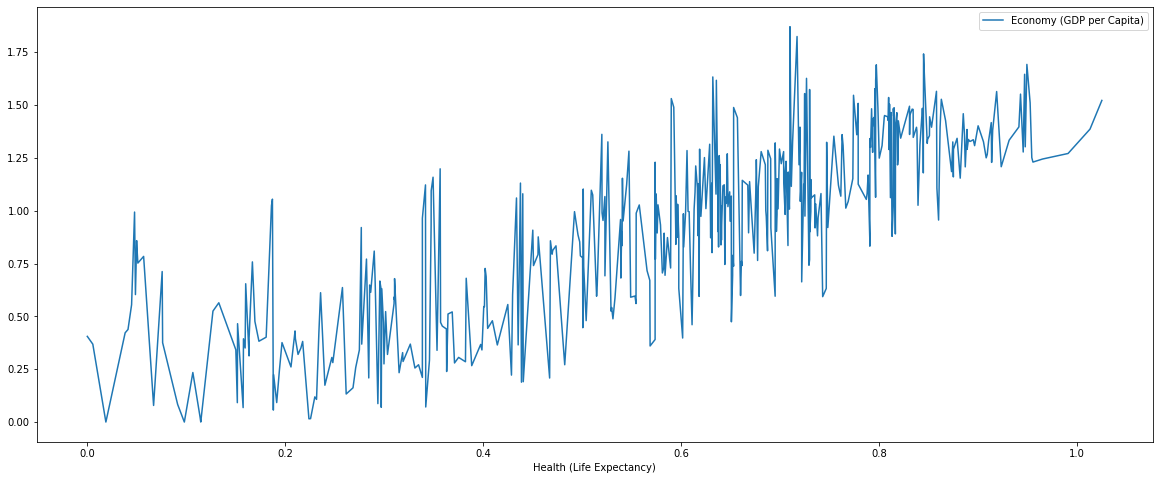

In [12]:
whr[['Health (Life Expectancy)','Economy (GDP per Capita)']].groupby("Health (Life Expectancy)").mean().plot(figsize=(20,8))


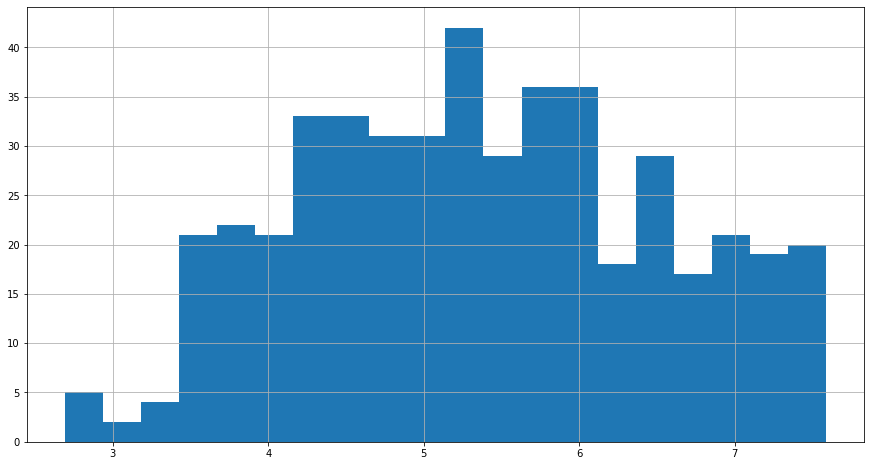

In [14]:
plt.figure(figsize=(15,8))
whr['Happiness Score'].hist(bins=20)

In [15]:
x=whr.drop(['Happiness Score'],axis=1)
y=whr[['Happiness Score']]
print(x.shape, y.shape)

(470, 7) (470, 1)


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(305, 7)
(305, 1)
(165, 7)
(165, 1)


In [17]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_pred=lr.predict(x_test)
y_pred[0:5]

array([[4.79539467],
       [6.16777322],
       [3.60315995],
       [4.0283625 ],
       [5.71532001]])

In [19]:
y_test[0:5]

,Happiness Score
105,4.795
40,6.168
144,3.603
134,4.028
62,5.715


In [20]:
from sklearn.metrics import mean_squared_error
#mean_squared_error(y_test,y_pred)

In [21]:
from sklearn.tree import DecisionTreeRegressor
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [22]:
mean_squared_error(y_test,y_pred)

8.212755375966266e-08

In [23]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [24]:
y_pred2= model.predict(x_test)
y_pred2[0:5]

array([4.62786001, 6.31172004, 3.86713999, 3.98029001, 5.58937999])

In [25]:
y_test[0:5]

,Happiness Score
105,4.795
40,6.168
144,3.603
134,4.028
62,5.715


In [26]:
accuracy = model.score(x_test,y_test)
accuracy*100

91.81185246504204